In [1]:
#loading all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

E:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#Reading the file
dsk=pd.read_csv("Skyserver.csv")

In [3]:
dsk.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
dsk.shape

(10000, 18)

In [5]:
dsk.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
dsk.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [7]:
#As datatype is object we are using Label Encoder
le=LabelEncoder()
dsk['class']=le.fit_transform(dsk['class'])

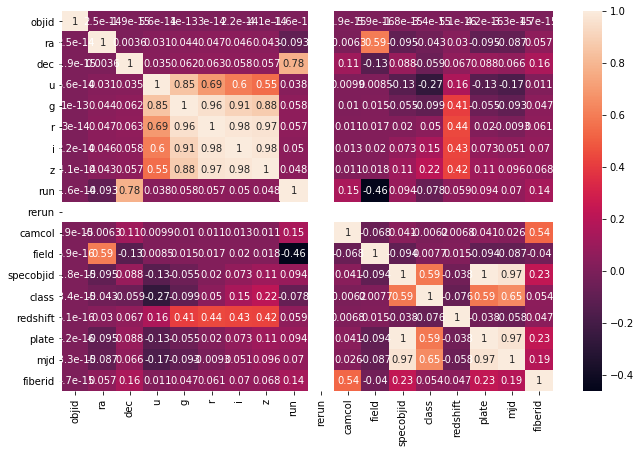

In [8]:
plt.figure(figsize=(11,7))
sns.heatmap(dsk.corr(),annot=True)

In [9]:
dsk.drop('u',axis=1,inplace=True)

In [10]:
y=pd.DataFrame()
y['class']=dsk['class']

In [11]:
dsk.drop('class',axis=1,inplace=True)

In [12]:
x=dsk
x


,objid,ra,dec,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229


In [13]:
x.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [14]:
#using standard scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [15]:
#Performing Logistic regression checking for random state value
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 40 is 0.977
accuracy_score: 41 is 0.97
accuracy_score: 42 is 0.966
accuracy_score: 43 is 0.9705
accuracy_score: 44 is 0.9685
accuracy_score: 45 is 0.9765
accuracy_score: 46 is 0.9715
accuracy_score: 47 is 0.97
accuracy_score: 48 is 0.964
accuracy_score: 49 is 0.9735
accuracy_score: 50 is 0.9745
accuracy_score: 51 is 0.9745
accuracy_score: 52 is 0.9675
accuracy_score: 53 is 0.9715
accuracy_score: 54 is 0.9645
accuracy_score: 55 is 0.9695
accuracy_score: 56 is 0.971
accuracy_score: 57 is 0.972
accuracy_score: 58 is 0.9715
accuracy_score: 59 is 0.9755
accuracy_score: 60 is 0.97
accuracy_score: 61 is 0.972
accuracy_score: 62 is 0.9705
accuracy_score: 63 is 0.968
accuracy_score: 64 is 0.97
accuracy_score: 65 is 0.968
accuracy_score: 66 is 0.971
accuracy_score: 67 is 0.965
accuracy_score: 68 is 0.974
accuracy_score: 69 is 0.9755
accuracy_score: 70 is 0.967
accuracy_score: 71 is 0.9695
accuracy_score: 72 is 0.9755
accuracy_score: 73 is 0.974
accuracy_score: 74 is 0.9725
accura

In [16]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=0.2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
KNN=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
rf=RandomForestClassifier(n_estimators=100,random_state=55)
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rf))

In [18]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
  


************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


accuracy_score= 0.9


Cross_val_score= 0.8909


Classification report
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       977
           1       0.98      0.83      0.90       167
           2       0.95      0.83      0.89       856

    accuracy                           0.90      2000
   macro avg       0.93      0.88      0.90      2000
weighted avg       0.91      0.90      0.90      2000



[[949   2  26]
 [ 20 138   9]
 [142   1 713]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=Fa

In [19]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,90.00,89.09
1,SVC,95.35,95.20
2,LogisticRegression,97.90,97.14
3,DecisionTreeClassifier,98.25,98.24
4,RandomForestClassifier,98.65,98.79


In [ ]:
#Conclusion:
#As class is object datatype i have used labelEncoder to convert into int datatype
#As per the correlation heatmap there is one column negatively correlating with target-u ,i have dropped the column
#As there is skewness in data i have used standard scaling technique to the data
#As per analysis of models, RandomForestclassifier is the best model for this dataset as it having high accuracy score and cross val score

In [20]:
joblib.dump(rf,'Model_skyserver.csv')

['Model_skyserver.csv']

In [21]:
model=joblib.load('Model_skyserver.csv')
model.predict(x_test)

array([0, 2, 2, ..., 2, 0, 1])